# Checking Results

In [ ]:
import pandas as pd
import pygmo as pg
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
configs = pd.read_csv('./results_no_cv_HO_29_10')

In [ ]:
configs

In [ ]:
pareto_index = pg.non_dominated_front_2d(configs[['rmse_test', 'std_test']])

In [ ]:
pareto_configs = configs.iloc[pareto_index]

In [ ]:
pareto_configs

In [ ]:
pareto_configs.iloc[1].net_cfg

In [ ]:
x = pareto_configs['rmse_test'].values
y = pareto_configs['std_test'].values
plt.fig
plt.scatter(x, y)
plt.xlabel('rmse_test')
plt.ylabel('std_test')

# for i, txt in enumerate(pareto_configs.index):
#     plt.annotate(txt, (x[i], y[i]))

In [ ]:
pareto_configs

In [ ]:
sns.set_theme()

plt.figure(figsize=(15,10))
sns.scatterplot(data=pareto_configs, x='rmse_test', y='std_test')
plt.title('Pareto Front')

In [ ]:
pareto_configs.loc[186].net_cfg

# Checking if changes work

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

import tensorflow as tf
from preprocessing import build_data
import pandas as pd
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from activations import Activate
from losses import CustomLoss
from preprocessing import build_data


import main



In [2]:
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)

In [3]:
model, train_results_df, test_results_df, test_x_orig, test_y_orig, scaler, train_x, test_x = main.main()
# model = main.main()

/home/kefalasm/Projects/rul_sa/mipego/mipego.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self._levels = np.array([self._space.bounds[i] for i in self._space.id_N]) # levels for discrete variable


{'num_rec': 4, 'max_time': 24, 'neuron_0': 76, 'neuron_1': 75, 'neuron_2': 74, 'neuron_3': 66, 'activation_0': 'tanh', 'activation_1': 'tanh', 'activation_2': 'sigmoid', 'activation_3': 'sigmoid', 'dropout_0': 0.018692516794622607, 'dropout_1': 0.8002018342665917, 'dropout_2': 0.615094589188039, 'dropout_3': 0.08230738757019833, 'recurrent_dropout_0': 0.6421264747391056, 'recurrent_dropout_1': 0.8933998465284962, 'recurrent_dropout_2': 0.6402495109098905, 'recurrent_dropout_3': 0.6693624215836003, 'final_activation_0': 'softplus', 'final_activation_1': 'softplus', 'percentage': 62, 'rul': 124, 'rul_style': 'nonlinear', 'lr': '0.0008896860421074306', 'batch': '128'}


 15%|█▌        | 12/80 [00:00<00:00, 118.11it/s]

(16340, 26)
(10312, 26)
(100,)


100%|██████████| 100/100 [00:00<00:00, 19219.65it/s]


train_x (16340, 24, 17) train_y (16340, 1) test_x (100, 24, 17) test_y (100, 1)
Model: "weibull_params"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24, 17)]          0         
_________________________________________________________________
masking (Masking)            (None, 24, 17)            0         
_________________________________________________________________
gru (GRU)                    (None, 24, 76)            21660     
_________________________________________________________________
gru_1 (GRU)                  (None, 24, 75)            34425     
_________________________________________________________________
gru_2 (GRU)                  (None, 24, 74)            33522     
_________________________________________________________________
gru_3 (GRU)                  (None, 66)                28116     
______________________________________

/home/kefalasm/rul_nn/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/2
128/128 [==============================] - 51s 342ms/step - loss: 3.6174 - val_loss: 2.9449
Epoch 2/2
128/128 [==============================] - 42s 332ms/step - loss: 2.7976 - val_loss: 2.7330
  fold  rmse_train  mae_train  r2_train  std_train  rmse_test   mae_test  \
0  NaN    50.32755  34.793847  0.054343   0.073488  35.369259  31.398813   

    r2_test  std_test                                            net_cfg  
0 -1.149833  0.069511  {"num_rec": 4, "max_time": 24, "neuron_0": 76,...  


In [4]:
model

In [10]:
# model.save('./toy_model')

In [9]:
# new_model = tf.keras.models.load_model('./toy_model', custom_objects={"CustomLoss": CustomLoss, "Activate": Activate})

In [54]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  #"1,2,3,4,5"  # uncomment in case running ONLY on CPU is required

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras import backend as k
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import History
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

from activations import Activate
from losses import CustomLoss
from preprocessing import build_data

import numpy as np
import pandas as pd
import math
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [2]:
net_cfg = {
     "max_time": 100,
     "lr": "0.001",
     "num_rec": 3,
     "neuron_0": 100,
     "activation_0": "tanh",
     "dropout_0": 0.25,
     "recurrent_dropout_0": 0.25,
     "neuron_1": 50,
     "activation_1": "tanh",
     "dropout_1": 0.25,
     "recurrent_dropout_1": 0.25,
     "neuron_2": 20,
     "activation_2": "tanh",
     "dropout_2": 0.25,
     "recurrent_dropout_2": 0.25,
     "final_activation_0": "exp",
     "final_activation_1": "softplus",
     "percentage": 50,
     "rul": 115,
     "rul_style": "nonlinear",
     "batch": "128",
}

In [3]:
cfg = {
        "cv": 10,
        "shuffle": True,
        "random_state": 21,
        "mask_value": -99,
        "reps": 30,
        "epochs": 20,
        "batches": 64,
        "in_reps": 10,
    }

In [4]:
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)

In [43]:
def weibull_pdf(alpha, beta, t):
    return (beta/alpha) * (t/alpha)**(beta-1)*np.exp(- (t/alpha)**beta)

In [44]:
def weibull_median(alpha, beta):
    return alpha*(-np.log(.5))**(1/beta)

In [45]:
def weibull_mode(alpha, beta):
    assert np.all(beta > 1)
    return alpha * ((beta-1)/beta)**(1/beta)

In [87]:
def weibull_variance(alpha, beta):
    var = alpha**2*(math.gamma(1+2/beta)-math.gamma(1+1/beta)**2)
    return var

In [5]:
def network(train_X, train_y, test_x, test_y, net_cfg, cfg):

    strategy = tf.distribute.MirroredStrategy()
    print("Number of devices: {}".format(strategy.num_replicas_in_sync))
    k.set_epsilon(1e-10)
    history = History()
    nan_terminator = callbacks.TerminateOnNaN()
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss')
    early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5)
    # checkpoint_filepath = './saved_models/cp-{epoch:04d}.ckpt'
    # checkpoint = callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='loss', verbose=1)
    # logdir="logs/test1" #+ datetime.now().strftime("%Y%m%d-%H%M%S")
    # tensorboard = callbacks.TensorBoard(log_dir=logdir)

    window = train_X.shape[1]
    n_features = train_X.shape[2]

    # with strategy.scope():  # Create a MirroredStrategy.

    inputs = keras.Input(shape=(window, n_features))
    masking_layer = keras.layers.Masking(mask_value=cfg['mask_value'])(inputs)

    # recurrent layers
    if net_cfg['num_rec'] > 1:
        for i in np.arange(net_cfg['num_rec']-1):
            masking_layer = keras.layers.GRU(net_cfg['neuron_'+str(i)], activation=net_cfg['activation_'+str(i)],
                                    dropout=net_cfg['dropout_'+str(i)],
                                    recurrent_dropout=net_cfg['recurrent_dropout_'+str(i)],
                                    return_sequences=True)(masking_layer)
    last = i + 1
    gru_last = keras.layers.GRU(net_cfg['neuron_'+str(last)], activation=net_cfg['activation_'+str(last)],
                                dropout=net_cfg['dropout_'+str(last)],
                                recurrent_dropout=net_cfg['recurrent_dropout_'+str(last)],
                                return_sequences=False)(masking_layer)

    dense_1 = keras.layers.Dense(2)(gru_last)
    custom_activation = Activate(net_cfg=net_cfg)
    outputs = keras.layers.Activation(custom_activation)(dense_1)

    model = keras.Model(inputs=inputs, outputs=outputs, name="weibull_params")

    # rmse = tf.keras.metrics.RootMeanSquaredError()
    model.compile(loss=CustomLoss(kind='continuous', reduce_loss=True), optimizer=Adam(lr=eval(net_cfg['lr']),
                                                                                    clipvalue=0.5))
    model.summary()  # uncomment for debugging

    batch_size=eval(net_cfg['batch'])
    model.fit(train_X, train_y,
              epochs=cfg['epochs'],
              batch_size=batch_size,
              validation_data=(test_x, test_y),
              verbose=1,
              callbacks=[nan_terminator, history, reduce_lr, early_stopping],#, checkpoint, tensorboard],  # , tensorboard
              workers=32)

    return model, history



In [6]:
def load_data():

    np.random.seed(42)

    id_col = 'unit_number'
    time_col = 'time'
    feature_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + ['sensor_measurement_{}'.format(x) for x in
                                                                       range(1, 22)]
    column_names = [id_col, time_col] + feature_cols

    train_x_orig = pd.read_csv('./DataSets/CMAPSS/train_FD001.csv', header=None, sep='\s+', decimal=".")
    train_x_orig.columns = column_names

    test_x_orig = pd.read_csv('./DataSets/CMAPSS/test_FD001.csv', header=None, sep='\s+', decimal=".")
    test_x_orig.columns = column_names

    test_y_orig = pd.read_csv('./DataSets/CMAPSS/RUL_FD001.csv', header=None, names=['T'])

    # Make engine numbers and days zero-indexed
    train_x_orig.iloc[:, 0:2] -= 1
    test_x_orig.iloc[:, 0:2] -= 1

    train_idx = np.random.choice(range(train_x_orig.unit_number.unique().max()+1), replace=False, size=80)  # selecting 80 units for training
    train_idx.sort()

    vld_idx = np.array([x for x in range(train_x_orig.unit_number.unique().max()+1) if x not in train_idx])  # remaining are validation indices

    train_or = train_x_orig[train_x_orig.unit_number.isin(train_idx)]  # training data
    train_or.reset_index(drop=True, inplace=True)
    vld = train_x_orig[train_x_orig.unit_number.isin(vld_idx)]  # validation data
    vld.reset_index(drop=True, inplace=True)


    # Truncating the validation data randomly 5 times each
    vld_trunc = []
    test_y = []
    max_cycle = []
    test_index = []  # for debugging purposes
    temp_or_test_cycles = []
    counter = -1

    for i in set(vld.unit_number.unique()):
        # print(f'unit number is {i}')
        for j in range(1,6):  # 5 truncations per instance
            counter += 1
            np.random.seed(i*j)
            temp_df = vld[vld.unit_number == i]
            temp_df.reset_index(drop=True, inplace=True)  # important
            length = temp_df.shape[0]
            # print(length)
            temp_or_test_cycles.append(length)
            level = np.random.choice(np.arange(5, 96), 1)[0]
            r = np.int(length * (1 - level / 100))
            # test_index.append(X_test_or[X_test_or.unit_number == i].index.tolist()[
            #                     :r + 1])  # check this with train_x_orig instead of X_test_or (probably it's the same)
            temp_df = temp_df.truncate(after=r)
            # print(temp_df.shape[0])
            # print('\n')
            temp_df['unit_number'] = np.repeat(counter, temp_df.shape[0])
            vld_trunc.append(temp_df)
            max_cycle.append(length)


    # test_index = [item for sublist in test_index for item in sublist]

    vld_trunc = pd.concat(vld_trunc)
    vld_trunc.reset_index(drop=True, inplace=True)
    # print(f'max len per unit is {max_cycle}')


    # Pre-processing data
    scaler = pipeline.Pipeline(steps=[
        ('minmax', MinMaxScaler(feature_range=(-1, 1))),
        ('remove_constant', VarianceThreshold())])

    train = train_or.copy()
    train = np.concatenate([train[['unit_number', 'time']], scaler.fit_transform(train[feature_cols])], axis=1)

    train_x, train_y = build_data(units=train[:, 0], time=train[:, 1], x=train[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=False, mask_value=cfg['mask_value'],
                                    original_data=None, net_cfg = net_cfg, label=net_cfg['rul_style'])

    vld = vld_trunc.copy()
    vld = np.concatenate([vld[['unit_number', 'time']], scaler.transform(vld[feature_cols])], axis=1)
    test_x, test_y = build_data(units=vld[:, 0],
        time=vld[:, 1],
        x=vld[:, 2:],
        max_time=net_cfg["max_time"],
        is_test=True,
        mask_value=cfg["mask_value"],
        original_data=np.array(max_cycle),
        net_cfg=net_cfg,
        label=net_cfg["rul_style"],
    )

    return train_x, train_y, test_x, test_y, train_or, vld_trunc

In [7]:
train_x, train_y, test_x, test_y, train, test = load_data()
print('train_x', train_x.shape, 'train_y', train_y.shape, 'test_x', test_x.shape, 'test_y', test_y.shape, 'train', train.shape, 'test', test.shape)



100%|██████████| 100/100 [00:00<00:00, 13470.91it/s]

train_x (16340, 100, 17) train_y (16340, 1) test_x (100, 100, 17) test_y (100, 1) train (16340, 26) test (10312, 26)


In [10]:
k.clear_session()
try:
    del model
except:
    pass

model, history = network(train_x, train_y, test_x, test_y, net_cfg, cfg)

In [109]:
# model.save('./toy_model')

INFO:tensorflow:Assets written to: ./toy_model/assets


INFO:tensorflow:Assets written to: ./toy_model/assets


In [8]:
model = tf.keras.models.load_model('./toy_model', custom_objects={"CustomLoss": CustomLoss, "Activate": Activate})

In [13]:
model

In [15]:
model.get_config()['output_layers']

[['activation', 0, 0]]

In [9]:
total_res_train = []
alphas = []
betas = []

for i in range(cfg["reps"]):
    tf.random.set_seed(i)
    train_predict = model(train_x, training=True).numpy()
    a, b = train_predict[:, 0], train_predict[:, 1]
    alphas.append(a)
    betas.append(b)

    res = []
    for j in range(a.shape[0]):
        for k in range(cfg["in_reps"]):
            sample = a[j] * np.random.weibull(b[j])
            while np.isinf(sample):
                sample = a[j] * np.random.weibull(b[j])
            res.append(sample)
    total_res_train.append(np.array(res))

total_res_train = np.array(total_res_train)
total_res_train = np.reshape(total_res_train, (cfg['reps'], a.shape[0], cfg['in_reps']))

train_predict = np.mean(total_res_train, axis=(0, 2))
train_predict = np.reshape(train_predict, (train_x.shape[0], 1))
train_result = np.concatenate((train_y, train_predict), axis=1)
train_results_df = pd.DataFrame(train_result, columns=["T", "predicted_mu"])
train_results_df["unit_number"] = train["unit_number"].to_numpy()
train_results_df["time"] = train["time"].to_numpy()
alphas = np.array(alphas)
betas = np.array(betas)


In [109]:
total_res_train = np.reshape(total_res_train, (30, 16340, 10))

In [116]:
total_res_train.shape

(30, 16340, 10)

In [55]:
total_res_train.shape

(30, 16340, 10)

In [10]:
train_results_df

,T,predicted_mu,unit_number,time
0,115.00,1.358532e+02,0,0
1,115.00,1.185983e+02,0,1
2,115.00,1.129150e+02,0,2
3,115.00,1.136382e+02,0,3
4,115.00,1.113779e+02,0,4
...,...,...,...,...
16335,5.75,7.300236e+273,99,195
16336,4.60,7.550270e+136,99,196
16337,3.45,2.287771e+44,99,197
16338,2.30,1.684604e+291,99,198


In [122]:
alphas[:, 16339]

array([ 0.69603026,  0.25142407,  1.63097   ,  3.6068285 ,  1.7777302 ,
       13.916192  ,  4.350292  ,  0.88832676,  0.8560886 ,  3.5294852 ,
        6.6998653 ,  2.5611663 ,  7.6697054 ,  1.8165591 , 14.562068  ,
        1.8379799 ,  2.2947423 ,  6.7427173 ,  5.3832097 ,  9.982378  ,
        3.7902331 , 18.822044  ,  0.31071454,  2.0553992 ,  1.2713383 ,
        0.48836654,  4.952608  ,  2.4789808 ,  0.5220742 ,  1.3979818 ],
      dtype=float32)

In [90]:
total_res_train.shape

(30, 16340, 10)

In [103]:
total_res_train[:, 16336, :]

1

In [23]:
train_x.shape

(16340, 100, 17)

In [24]:
a.shape

(16340,)

In [57]:
alphas.shape

(30, 16340)

In [58]:
betas.shape

(30, 16340)

In [60]:
betas[:,-200:].shape

(30, 200)

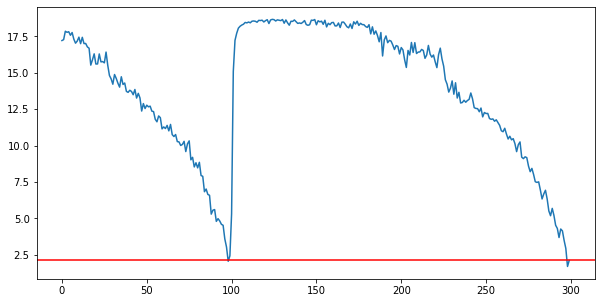

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
s = np.mean(betas[:,-300:], axis=0)
s_ = np.max(s) - s
plt.plot(s)
plt.axhline(y=2.111, color='red')
# plt.plot(np.mean(alphas[:,:192], axis=0))

In [27]:
alphas[:,1]

array([119.31697 , 111.037285, 114.55669 , 122.89945 , 103.268654,
       120.77607 , 126.023056, 121.03325 , 113.68639 , 125.831985,
       118.30063 , 130.60402 , 128.6434  , 115.73347 , 123.352936,
       109.59483 , 113.37349 , 148.26991 , 115.395836, 129.1942  ,
       115.90782 , 118.302155, 125.316795, 113.08723 , 120.380035,
       108.70629 , 111.71068 , 115.72833 , 109.26651 , 112.445625],
      dtype=float32)

In [11]:
alphas[:,16338]

array([ 1.9190148 ,  0.41464147,  2.927708  ,  3.2925577 ,  5.722051  ,
        8.388119  ,  3.1181324 ,  3.5679204 , 15.390557  ,  1.4775571 ,
        1.0588459 , 12.841274  ,  4.0095673 ,  7.1153793 , 12.487473  ,
        0.7315632 ,  7.116613  , 16.481302  ,  2.1284702 , 11.644492  ,
        6.0362945 ,  0.11732421, 10.069559  ,  4.796375  ,  5.60741   ,
        4.447548  ,  4.424074  ,  0.90631235,  0.5405445 ,  3.7018604 ],
      dtype=float32)

In [75]:
# train_predict_1[:, 16339]

In [30]:
betas[:,1]

array([14.949405 , 15.688996 , 15.383432 , 15.760617 , 13.859062 ,
       15.518084 , 15.613432 , 15.831271 , 16.073015 , 15.947414 ,
       16.398558 , 14.606908 , 15.24589  , 16.279568 , 14.345835 ,
       16.05235  , 16.22089  , 11.382352 , 15.849575 , 14.071932 ,
       15.801338 , 15.800645 , 16.374046 , 16.284801 , 14.6201515,
       16.629366 , 16.113174 , 15.626939 , 13.276964 , 16.45692  ],
      dtype=float32)

In [12]:
betas[:,16338]

array([8.2496011e-01, 7.7308409e-02, 1.8967047e+00, 1.5934720e+00,
       4.0007377e+00, 4.5299850e+00, 2.1424785e+00, 2.0344706e+00,
       6.4601555e+00, 3.4041187e-01, 2.4986914e-01, 4.1518250e+00,
       2.5884914e+00, 3.0323715e+00, 5.3098984e+00, 2.9537183e-01,
       2.8385630e+00, 6.1554756e+00, 1.3251436e-01, 5.2993221e+00,
       2.4671493e+00, 2.8689933e-04, 3.8657877e+00, 1.8962667e+00,
       2.4876914e+00, 2.1309223e+00, 1.6164610e+00, 5.8818661e-02,
       1.3974577e-01, 2.6355090e+00], dtype=float32)

In [76]:
# train_predict_2[:, 16339]

In [81]:
weib_tests = []
for a,b in zip(alphas[:, 16339], betas[:, 16339]):
    weib_tests.append(a * np.random.weibull(b, cfg["in_reps"]))

weib_tests = np.array(weib_tests)

In [87]:
np.isinf(weib_tests).sum()

0

In [36]:
total_res_train.shape

(30, 16340, 10)

In [37]:
train_predict.shape

(16340, 1)

In [18]:
train_predict_1 = []
train_predict_2 = []

success = True

for i in range(cfg['reps']):
    tf.random.set_seed(i)
    train_predict = model(train_x, training=True).numpy()
    train_predict_1.append(train_predict[:, 0].reshape(train_predict[:, 0].shape[0], 1))
    train_predict_2.append(train_predict[:, 1].reshape(train_predict[:, 1].shape[0], 1))

train_predict_1_mean = np.mean(np.hstack(train_predict_1), axis=1)
train_predict_2_mean = np.mean(np.hstack(train_predict_2), axis=1)
train_predict_1_mean = train_predict_1_mean.reshape(train_predict_1_mean.shape[0], 1)
train_predict_2_mean = train_predict_2_mean.reshape(train_predict_2_mean.shape[0], 1)
train_predict_1_std = np.std(np.hstack(train_predict_1), axis=1)
train_predict_2_std = np.std(np.hstack(train_predict_2), axis=1)
train_predict_1_std = train_predict_1_std.reshape(train_predict_1_std.shape[0], 1)
train_predict_2_std = train_predict_2_std.reshape(train_predict_2_std.shape[0], 1)

train_predict = np.hstack([train_predict_1_mean, train_predict_2_mean,
                            train_predict_1_std, train_predict_2_std])

train_predict = np.resize(train_predict, (train_x.shape[0], 4))  # changed from 2 to 4
train_result = np.concatenate((train_y, train_predict), axis=1)
train_results_df_old = pd.DataFrame(train_result, columns=['T', 'mean_alpha', 'mean_beta', 'std_alpha',
                                                        'std_beta'])  # (add 'E' for event)
train_results_df_old['unit_number'] = train['unit_number'].to_numpy()
train_results_df_old['time'] = train['time'].to_numpy()

train_results_df_old['predicted_mu'] = train_results_df_old[['mean_alpha', 'mean_beta']].apply(
    lambda row: weibull_mean(row[0], row[1]), axis=1)

In [20]:
train_predict_1 = np.array(train_predict_1)

In [21]:
train_predict_2 = np.array(train_predict_2)

In [22]:
train_predict_1.shape

(30, 16340, 1)

In [23]:
train_predict_1.resize(30, 16340)

In [24]:
train_predict_2.resize(30, 16340)

In [25]:
train_predict_1[:,1]

array([132.97829 , 123.23054 , 124.54932 , 122.32817 , 120.403915,
       130.73293 , 104.53065 , 119.13004 , 113.69697 , 153.43895 ,
       152.46115 , 122.44974 , 125.80001 , 120.75015 , 107.46349 ,
       114.002716, 125.00156 , 111.63954 , 108.24521 , 108.84976 ,
       139.0864  , 137.08862 , 118.6768  , 118.238594, 134.57979 ,
       138.68983 , 126.762245, 115.65711 , 139.75046 , 135.50706 ],
      dtype=float32)

In [40]:
train_predict_1[:,16339]

array([ 0.41705817, 12.625637  ,  0.63515407,  7.228504  ,  3.1942136 ,
        0.07566568,  2.8691864 ,  1.387541  ,  4.0971513 ,  5.763522  ,
       14.557368  , 12.584854  ,  3.7971506 ,  1.4213378 ,  6.7815943 ,
        4.707724  ,  0.19926678,  2.8029566 ,  5.4847    ,  3.3876393 ,
        0.5993108 ,  1.0875534 ,  7.0147896 ,  2.7878008 ,  3.4252214 ,
        7.5762835 ,  0.1216777 ,  0.4439667 ,  0.1773132 ,  0.9611091 ],
      dtype=float32)

In [27]:
train_predict_2[:,1]

array([14.678265, 15.838853, 15.775572, 14.408605, 16.353857, 14.302875,
       15.161706, 16.727022, 15.966782, 12.435256, 13.328977, 16.388186,
       15.86963 , 16.508802, 15.440501, 15.19744 , 16.054945, 15.993076,
       15.267684, 16.106028, 15.3978  , 15.539538, 16.215986, 16.234024,
       14.858935, 14.238721, 14.513758, 16.973845, 15.03419 , 15.020367],
      dtype=float32)

In [39]:
train_predict_2[:,16339]

array([5.8427448e-03, 4.9685388e+00, 3.4116201e-02, 2.3138850e+00,
       1.6480570e+00, 8.2829857e-04, 1.0383902e+00, 1.1439174e+00,
       2.5860670e+00, 3.9850752e+00, 4.9656487e+00, 5.6004195e+00,
       2.4956729e+00, 3.6161962e-01, 3.0081646e+00, 2.4999211e+00,
       3.5001922e-03, 1.5262645e+00, 3.6114802e+00, 1.1387600e+00,
       6.9223523e-02, 2.2952071e-01, 2.7980986e+00, 2.5398455e+00,
       1.5327101e+00, 3.9090512e+00, 6.5446319e-04, 1.4355426e-03,
       1.4663087e-03, 1.6815068e-01], dtype=float32)

In [32]:
weib_tests_old = []
for a,b in zip(train_predict_1[:, 16339], train_predict_2[:, 16339]):
    weib_tests_old.append(a * np.random.weibull(b, cfg["in_reps"]))

weib_tests_old = np.array(weib_tests_old)

In [33]:
weib_tests_old.shape

(30, 10)

In [34]:
np.isinf(weib_tests_old).sum()

6

In [35]:
weib_tests_old

array([[1.03548105e-091, 1.18890112e-011, 2.14093963e+113,
        1.32122409e+000, 2.74676193e-108, 2.25286390e-184,
        5.39889323e-212, 3.99865490e+047, 9.36530096e+046,
        5.38124627e+055],
       [1.66505781e+001, 8.35894106e+000, 1.11503345e+001,
        1.50562481e+001, 7.47121026e+000, 1.51222583e+001,
        1.36188747e+001, 1.27515154e+001, 1.02780670e+001,
        8.09552990e+000],
       [2.02412786e-023, 1.11960845e+001, 5.46507616e-009,
        3.25045649e+012, 2.20373050e-035, 1.73462270e+007,
        8.27133346e+010, 2.17671201e+015, 9.03276339e+015,
        3.75325046e+009],
       [1.17186163e+001, 2.62312949e+000, 1.37077904e+001,
        5.48382404e+000, 6.68961391e+000, 2.80010348e+000,
        4.35862926e+000, 6.17466251e+000, 5.84394461e+000,
        5.53020167e+000],
       [1.79220715e+000, 3.14322193e+000, 1.64925369e+000,
        2.98592237e+000, 1.27158312e+000, 3.24208788e+000,
        4.38814381e+000, 1.82020060e+000, 2.36998617e+000,
        3.1

In [36]:
mean_a_old = np.mean(train_predict_1[:, 16339])

In [37]:
mean_b_old = np.mean(train_predict_2[:, 16339])

In [38]:
weibull_mean(mean_a_old, mean_b_old)

3.503604979558454

In [27]:
train_results_df_old.shape

(16340, 8)

In [111]:
s = train_results_df_old[train_results_df_old.unit_number==3].iloc[::5]

In [112]:
s

,T,mean_alpha,mean_beta,std_alpha,std_beta,unit_number,time,predicted_mu
192,115.000000,147.541412,5.234767,21.857027,1.050252,3,0,135.826526
197,115.000000,114.923759,18.230320,3.502093,0.414066,3,5,111.610765
202,115.000000,116.365547,18.418175,2.601429,0.306501,3,10,113.042029
207,115.000000,115.431725,18.583647,2.217866,0.154798,3,15,112.161534
212,115.000000,115.639580,18.578901,2.445693,0.137835,3,20,112.362740
217,115.000000,115.041122,18.653599,2.011448,0.109407,3,25,111.793100
222,115.000000,115.318802,18.596302,1.865619,0.239819,3,30,112.053829
227,115.000000,114.637695,18.646124,2.014901,0.187663,3,35,111.399884
232,115.000000,114.438828,18.567556,2.193369,0.544217,3,40,111.194214
237,115.000000,113.857040,18.408686,4.324592,0.838237,3,45,110.603647


In [101]:
def plot_weibull_variance(results_df):

    plt.figure(figsize=(30,20))
    palette = sns.color_palette("RdBu_r", results_df.shape[0] + 1)
    color_dict = dict(enumerate(palette))

    for i, row in enumerate(results_df.iterrows()):
            alpha=row[1]['mean_alpha']
            beta = row[1]['mean_beta']
            color = color_dict[i]
            variance = weibull_variance(alpha, beta)

            plt.scatter(i, variance, color=color)
            plt.text(i, variance+0.5, i*5)
            plt.title('Weibull distributions variance')
            # plt.legend()


In [84]:
def plot_weibull_predictions(results_df):

    fig, axarr = plt.subplots(1, figsize=(30,20))

    t=np.arange(0,400)

    palette = sns.color_palette("RdBu_r", results_df.shape[0] + 1)
    color_dict = dict(enumerate(palette))

    for i, row in enumerate(results_df.iterrows()):
            alpha=row[1]['mean_alpha']
            beta = row[1]['mean_beta']
            T = row[1]['T']
            label = 'a={} b={}'.format(alpha, beta)

            color = color_dict[i]
            ax= axarr  #[0]
            mode = weibull_mode(alpha, beta)
            y_max = weibull_pdf(alpha, beta, mode)    

            ax.plot(t, weibull_pdf(alpha, beta, t), color=color)  # label=label
            ax.scatter(T, weibull_pdf(alpha,beta, T), color=color, s=100)
            ax.vlines(mode, ymin=0, ymax=y_max, colors=color, linestyles='--')
            ax.text(mode, y_max, i*5)

            ax.set_title('Weibull distributions')
            # ax.legend()
    
    # ax=axarr[1]
    
    # median_predictions = weibull_median(results_df['alpha'], results_df['beta'])
    # mean_predictions = results_df[['alpha', 'beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
    # mode_predictions = weibull_mode(results_df['alpha'], results_df['beta'])
#     x = results_df['time']
    
#     ax.scatter(x, results_df['T'], label='survival_time', color='black')

#     ax.scatter(results_df['T'], median_predictions, label='median_prediction')
#     ax.scatter(results_df['T'], mean_predictions, label='mean_prediction')
    # ax.scatter(results_df['T'], mode_predictions, label='m_prediction')
    # ax.set_title('MAP prediction Vs. true')
    

    # ax.legend()
    
    # ax=axarr[2]
    # sns.distplot(results_df['T'] - mode_predictions, ax=ax)
    # ax.set_title('Error')

#     ax.plot(x, results_df['alpha'], label='alpha')
#     ax.legend()
    
#     ax = axarr[3]
#     ax.plot(x, results_df['beta'], label='beta')
#     ax.legend()
    
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     fig.suptitle(title)
    plt.show()


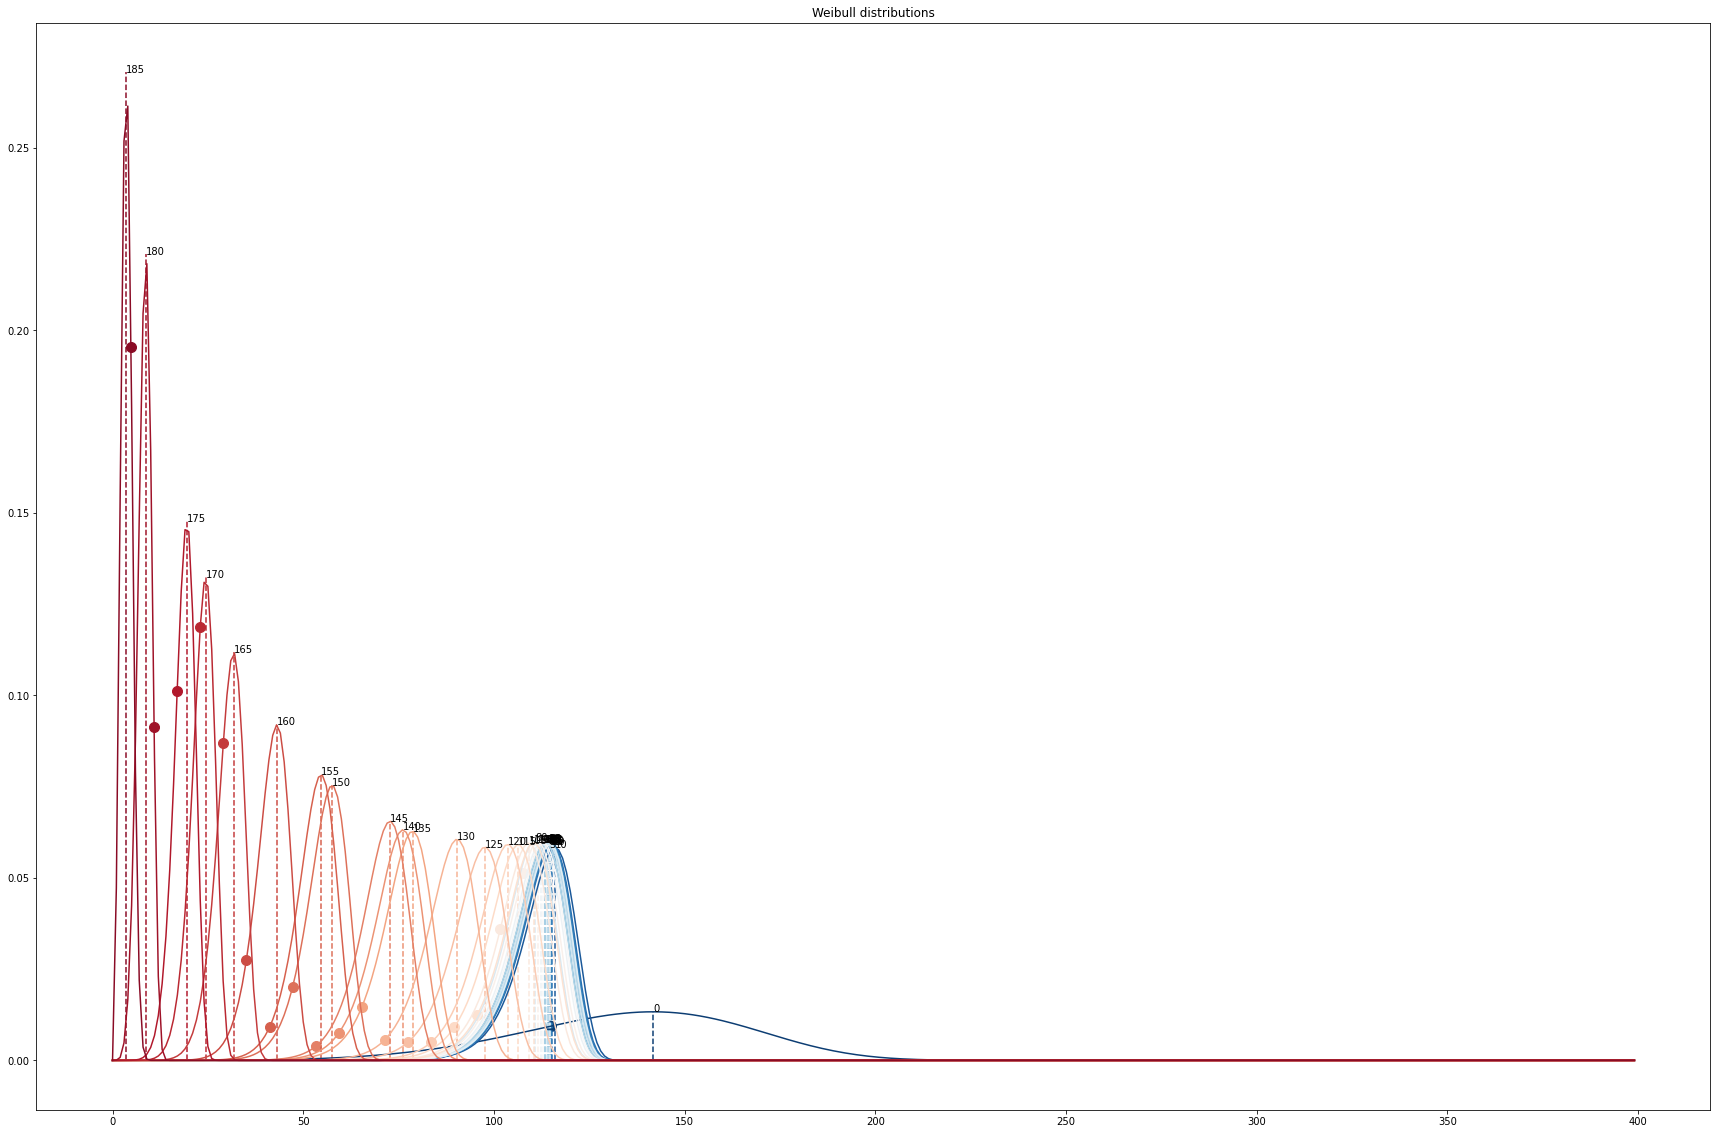

In [113]:
plot_weibull_predictions(s)

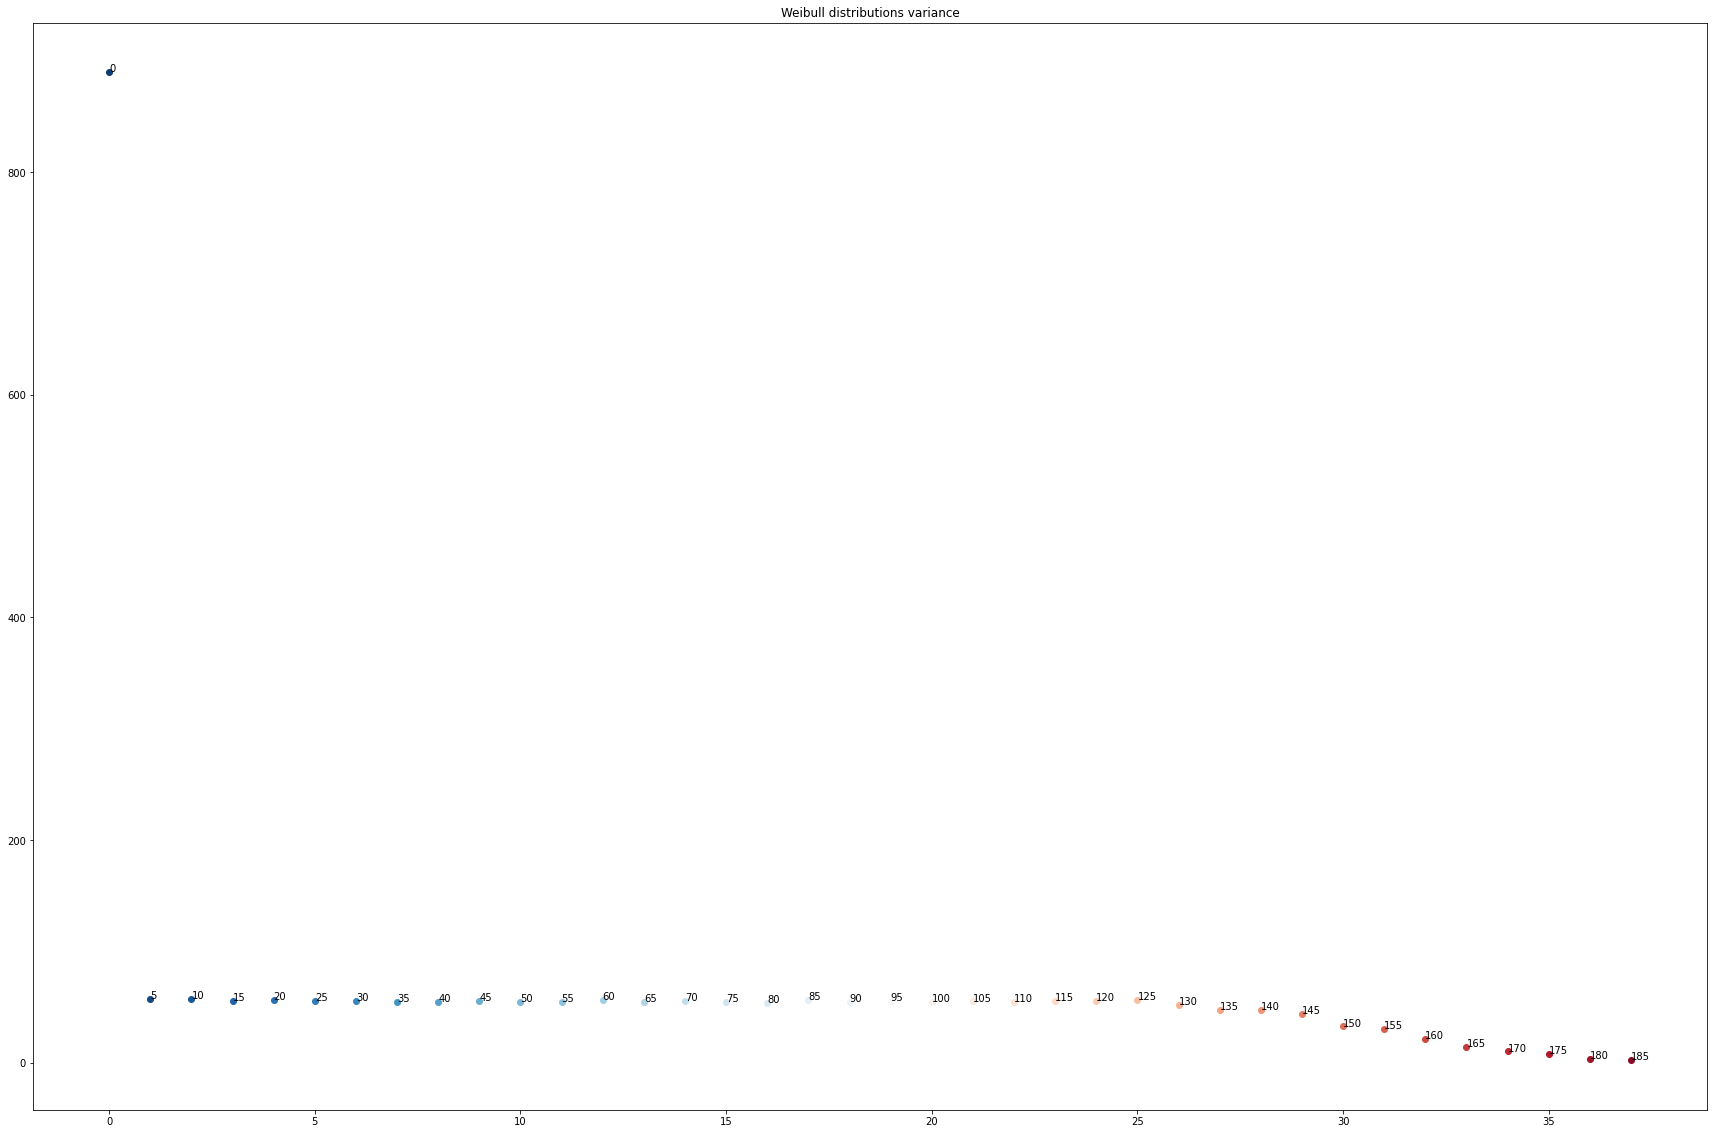

In [114]:
plot_weibull_variance(s)

In [115]:
a = np.array([[1,2,3,4],[5,6,7,8], [9,10,11,12]])

In [121]:
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [125]:
np.mean(a[:,2:], axis=1)

array([ 3.5,  7.5, 11.5])

In [ ]:
net_cfg = {"num_rec": 2, "max_time": 25, "neuron_0": 74, "neuron_1": 71, "neuron_2": 78, "neuron_3": 68,
     "activation_0": "tanh", "activation_1": "sigmoid", "activation_2": "sigmoid", "activation_3": "tanh",
      "dropout_0": 0.04198965650706104, "dropout_1": 0.6518949855946009, "dropout_2": 0.5134433415117658,
       "dropout_3": 0.44181882048621723, "recurrent_dropout_0": 0.011379281378212352, "recurrent_dropout_1": 0.07877843876273939,
        "recurrent_dropout_2": 0.25685072170110057, "recurrent_dropout_3": 0.16640448683710898, "final_activation_0": "softplus",
         "final_activation_1": "softplus", "percentage": 63, "rul": 125, "rul_style": "nonlinear", "lr": 0.021745779733326226, "batch": "256"}

In [ ]:
id_col = 'unit_number'
time_col = 'time'
max_time = 32
mask_value = -99

feature_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + ['sensor_measurement_{}'.format(x) for x in
                                                                    range(1, 22)]
column_names = [id_col, time_col] + feature_cols
test_or = test_x_orig.copy()
test_or = np.concatenate([test_or[['unit_number', 'time']], scaler.transform(test_or[feature_cols])], axis=1)


# Preparing data for the RNN (numpy arrays)
test_or, _ = build_data(units=test_or[:, 0], time=test_or[:, 1], x=test_or[:, 2:], max_time=net_cfg['max_time'],
                                is_test=True, mask_value=-99,
                                original_data=np.repeat(200, test_or.shape[0]), net_cfg = net_cfg, label=net_cfg['rul_style'])


In [ ]:
reps = 30
test_predict_1_or = []
test_predict_2_or = []
for _ in range(reps):
    test_predict_or = model(test_or, training=True).numpy()
#     print(test_predict_or.shape)
#     break
    test_predict_1_or.append(test_predict_or[:,0].reshape(test_predict_or[:,0].shape[0], 1))
    test_predict_2_or.append(test_predict_or[:,1].reshape(test_predict_or[:,1].shape[0], 1))

test_predict_1_mean_or = np.average(np.hstack(test_predict_1_or), axis=1)
test_predict_2_mean_or = np.average(np.hstack(test_predict_2_or), axis=1)
test_predict_1_mean_or = test_predict_1_mean_or.reshape(test_predict_1_mean_or.shape[0],1)
test_predict_2_mean_or = test_predict_2_mean_or.reshape(test_predict_2_mean_or.shape[0],1)
test_predict_1_std_or = np.std(np.hstack(test_predict_1_or), axis=1)
test_predict_2_std_or = np.std(np.hstack(test_predict_2_or), axis=1)
test_predict_1_std_or = test_predict_1_std_or.reshape(test_predict_1_std_or.shape[0],1)
test_predict_2_std_or = test_predict_2_std_or.reshape(test_predict_2_std_or.shape[0],1)


test_predict_or = np.hstack([test_predict_1_mean_or, test_predict_2_mean_or, 
                           test_predict_1_std_or, test_predict_2_std_or])    

test_predict_or = np.resize(test_predict_or, (test_or.shape[0], 4))  # changed from 2 to 4
test_result_or = np.concatenate((test_y_orig, test_predict_or), axis=1)
test_results_df_or = pd.DataFrame(test_result_or, columns=['T',   'mean_alpha', 'mean_beta', 'std_alpha', 'std_beta']) # (add 'E' for event)
#     test_results_df['unit_number'] = train_x_orig.iloc[test_index]['unit_number'].to_numpy() # Note the train_x_orig
#     test_results_df['time'] = train_x_orig.iloc[test_index]['time'].to_numpy()

test_results_df_or['predicted_mu'] = test_results_df_or[['mean_alpha', 'mean_beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
test_results_df_or['predicted_std+'] = test_results_df_or[['mean_alpha', 'mean_beta', 'std_alpha', 
                                                       'std_beta']].apply(lambda row: weibull_mean(row[0]+1.96*row[2]/np.sqrt(reps), 
                                                                                                   row[1]+1.96*row[3]/np.sqrt(reps)), axis=1)
test_results_df_or['predicted_std-'] = test_results_df_or[['mean_alpha', 'mean_beta', 'std_alpha', 
                                                           'std_beta']].apply(lambda row: weibull_mean(row[0]-1.96*row[2]/np.sqrt(reps),
                                                                                                       row[1]-1.96*row[3]/np.sqrt(reps)), axis=1)




# Old way
# test_predict_or = model(test_or, training=True).numpy()  # equivalent to model.predict(test_or) but with training=False
# test_predict_or = np.resize(test_predict_or, (test_or.shape[0], 2))
# test_result_or = np.concatenate((test_y_orig, test_predict_or), axis=1)
# test_results_df_or = pd.DataFrame(test_result_or, columns=['T', 'alpha', 'beta'])
# test_results_df_or['unit_number'] = np.arange(1, test_results_df_or.shape[0]+1)

# test_results_df_or['predicted_mu'] = test_results_df_or[['alpha', 'beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)

In [ ]:
test_results_df_or

In [ ]:
#1 - 10 epochs
np.sqrt(mean_squared_error(test_results_df_or['predicted_mu'], test_results_df_or['T']))

In [ ]:
#1 - 50 epochs
np.sqrt(mean_squared_error(test_results_df_or['predicted_mu'], test_results_df_or['T']))

In [ ]:
#2 - 21/50 epochs
np.sqrt(mean_squared_error(test_results_df_or['predicted_mu'], test_results_df_or['T']))

In [ ]:
for unit_number, grp in train_results_df.groupby('unit_number'):
    plot_weibull_predictions(grp, unit_number)
    break

In [ ]:
for unit_number, grp in test_results_df.groupby('unit_number'):
    plot_weibull_predictions(grp, unit_number)
    break

# Training full model on the best HP

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1,2,3,4,5"  # uncomment in case running ONLY on CPU is required

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras import backend as k
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import History
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

from activations import Activate
from losses import CustomLoss
from preprocessing import build_data

import numpy as np
import pandas as pd
import math
from datetime import datetime

from sklearn import pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [ ]:
net_cfg = {"num_rec": 3, "max_time": 26, "neuron_0": 73, "neuron_1": 71, "neuron_2": 82, "neuron_3": 82, "activation_0": "tanh",
     "activation_1": "sigmoid", "activation_2": "sigmoid", "activation_3": "tanh", "dropout_0": 0.06943171652267692,
      "dropout_1": 0.12639579059484615, "dropout_2": 0.3822443511564662, "dropout_3": 0.4580962846531429,
       "recurrent_dropout_0": 0.3280089650917844, "recurrent_dropout_1": 0.69930466502713, "recurrent_dropout_2": 0.24506744915217923,
        "recurrent_dropout_3": 0.7699919737017498, "final_activation_0": "exp", "final_activation_1": "softplus", "percentage": 73,
        "rul": 121, "rul_style": "nonlinear", "lr": 0.005357912753227542, "batch": "128"}


In [ ]:
cfg = {'cv': 10, 'shuffle': True,
'random_state': 21,
'mask_value': -99,
'reps': 30,
'epochs': 100,
'batches': 64}

In [ ]:
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)

In [ ]:
def network(train_X, train_y, net_cfg, cfg):
    k.set_epsilon(1e-10)
    history = History()
    nan_terminator = callbacks.TerminateOnNaN()
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss')
    early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5)
    checkpoint_filepath = './saved_models/cp-{epoch:04d}.ckpt'
    checkpoint = callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='loss', verbose=1)
    logdir="logs/test1" #+ datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard = callbacks.TensorBoard(log_dir=logdir)

    window = train_X.shape[1]
    n_features = train_X.shape[2]

    inputs = keras.Input(shape=(window, n_features))
    masking_layer = keras.layers.Masking(mask_value=cfg['mask_value'])(inputs)

    # recurrent layers
    if net_cfg['num_rec'] > 1:
        for i in np.arange(net_cfg['num_rec']-1):
            masking_layer = keras.layers.GRU(net_cfg['neuron_'+str(i)], activation=net_cfg['activation_'+str(i)],
                                    dropout=net_cfg['dropout_'+str(i)],
                                    recurrent_dropout=net_cfg['recurrent_dropout_'+str(i)],
                                    return_sequences=True)(masking_layer)
    last = i + 1
    gru_last = keras.layers.GRU(net_cfg['neuron_'+str(last)], activation=net_cfg['activation_'+str(last)],
                                dropout=net_cfg['dropout_'+str(last)],
                                recurrent_dropout=net_cfg['recurrent_dropout_'+str(last)],
                                return_sequences=False)(masking_layer)

    dense_1 = keras.layers.Dense(2)(gru_last)
    custom_activation = Activate(net_cfg=net_cfg)
    outputs = keras.layers.Activation(custom_activation)(dense_1)

    model = keras.Model(inputs=inputs, outputs=outputs, name="weibull_params")

    # rmse = tf.keras.metrics.RootMeanSquaredError()
    model.compile(loss=CustomLoss(kind='continuous', reduce_loss=True), optimizer=Adam(lr=net_cfg['lr'],
                                                                                       clipvalue=0.5))
    model.summary()  # uncomment for debugging

    batch_size=eval(net_cfg['batch'])
    model.fit(train_X, train_y,
              epochs=cfg['epochs'],
              batch_size=eval(net_cfg['batch']),
              verbose=1,
              callbacks=[nan_terminator, history, reduce_lr, early_stopping, checkpoint],#, tensorboard],  # , tensorboard
              workers=32)

    return model, history



In [ ]:
# %load_ext tensorboard


In [ ]:
# %tensorboard --logdir=logdir --port 8889


In [ ]:
def load_data():

    np.random.seed(42)

    id_col = 'unit_number'
    time_col = 'time'
    feature_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + ['sensor_measurement_{}'.format(x) for x in
                                                                       range(1, 22)]
    column_names = [id_col, time_col] + feature_cols

    train_x_orig = pd.read_csv('./DataSets/CMAPSS/train_FD001.csv', header=None, sep='\s+', decimal=".")
    train_x_orig.columns = column_names

    test_x_orig = pd.read_csv('./DataSets/CMAPSS/test_FD001.csv', header=None, sep='\s+', decimal=".")
    test_x_orig.columns = column_names

    test_y_orig = pd.read_csv('./DataSets/CMAPSS/RUL_FD001.csv', header=None, names=['T'])

    # Make engine numbers and days zero-indexed
    train_x_orig.iloc[:, 0:2] -= 1
    test_x_orig.iloc[:, 0:2] -= 1

    # Pre-processing data
    scaler = pipeline.Pipeline(steps=[
        ('minmax', MinMaxScaler(feature_range=(-1, 1))),
        ('remove_constant', VarianceThreshold())])

    train = train_x_orig.copy()
    train = np.concatenate([train[['unit_number', 'time']], scaler.fit_transform(train[feature_cols])], axis=1)

    train_x, train_y = build_data(units=train[:, 0], time=train[:, 1], x=train[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=False, mask_value=cfg['mask_value'],
                                    original_data=None, net_cfg = net_cfg, label=net_cfg['rul_style'])

    test_or = test_x_orig.copy()
    test_or = np.concatenate([test_or[['unit_number', 'time']], scaler.transform(test_or[feature_cols])], axis=1)


    # Preparing data for the RNN (numpy arrays)
    test_or, _ = build_data(units=test_or[:, 0], time=test_or[:, 1], x=test_or[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=True, mask_value=-99,
                                    original_data=np.repeat(200, test_or.shape[0]), net_cfg = net_cfg, label=net_cfg['rul_style'])

    

    return train_x, train_y, test_or, test_y_orig, train_x_orig


In [ ]:
train_x, train_y, test_x, test_y, train_x_orig = load_data()


In [ ]:
print('train_x', train_x.shape, 'train_y', train_y.shape, 'test_x', test_x.shape, 'test_y', test_y.shape)


In [ ]:
k.clear_session()
try:
    del model
except:
    pass

model, history = network(train_x, train_y, net_cfg, cfg)

In [ ]:
model = tf.keras.models.load_model('../autokeras_rul/best_model_autokeras_with_vld') #, custom_objects={"CustomLoss": CustomLoss, "Activate": Activate})

In [ ]:
model.summary()

In [ ]:
model.evaluate(train_x, train_y)

In [ ]:
model.evaluate(test_x, test_y)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(model.history.history['loss'],    label='training')
plt.title('loss')
plt.legend()

In [ ]:
reps = 30
test_predict_1_or = []
test_predict_2_or = []
for _ in range(reps):
    test_predict_or = model(test_x, training=True).numpy()
#     print(test_predict_or.shape)
#     break
    test_predict_1_or.append(test_predict_or[:,0].reshape(test_predict_or[:,0].shape[0], 1))
    test_predict_2_or.append(test_predict_or[:,1].reshape(test_predict_or[:,1].shape[0], 1))

test_predict_1_mean_or = np.average(np.hstack(test_predict_1_or), axis=1)
test_predict_2_mean_or = np.average(np.hstack(test_predict_2_or), axis=1)
test_predict_1_mean_or = test_predict_1_mean_or.reshape(test_predict_1_mean_or.shape[0],1)
test_predict_2_mean_or = test_predict_2_mean_or.reshape(test_predict_2_mean_or.shape[0],1)
test_predict_1_std_or = np.std(np.hstack(test_predict_1_or), axis=1)
test_predict_2_std_or = np.std(np.hstack(test_predict_2_or), axis=1)
test_predict_1_std_or = test_predict_1_std_or.reshape(test_predict_1_std_or.shape[0],1)
test_predict_2_std_or = test_predict_2_std_or.reshape(test_predict_2_std_or.shape[0],1)


test_predict_or = np.hstack([test_predict_1_mean_or, test_predict_2_mean_or, 
                           test_predict_1_std_or, test_predict_2_std_or])    

test_predict_or = np.resize(test_predict_or, (test_x.shape[0], 4))  # changed from 2 to 4
test_result_or = np.concatenate((test_y, test_predict_or), axis=1)
test_results_df_or = pd.DataFrame(test_result_or, columns=['T',   'mean_alpha', 'mean_beta', 'std_alpha', 'std_beta']) # (add 'E' for event)
#     test_results_df['unit_number'] = train_x_orig.iloc[test_index]['unit_number'].to_numpy() # Note the train_x_orig
#     test_results_df['time'] = train_x_orig.iloc[test_index]['time'].to_numpy()

test_results_df_or['predicted_mu'] = test_results_df_or[['mean_alpha', 'mean_beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
# test_results_df_or['predicted_std+'] = test_results_df_or[['mean_alpha', 'mean_beta', 'std_alpha', 
#                                                        'std_beta']].apply(lambda row: weibull_mean(row[0]+1.96*row[2]/np.sqrt(reps), 
#                                                                                                    row[1]+1.96*row[3]/np.sqrt(reps)), axis=1)
# test_results_df_or['predicted_std-'] = test_results_df_or[['mean_alpha', 'mean_beta', 'std_alpha', 
#                                                            'std_beta']].apply(lambda row: weibull_mean(row[0]-1.96*row[2]/np.sqrt(reps),
#                                                                                                        row[1]-1.96*row[3]/np.sqrt(reps)), axis=1)




# Old way
# test_predict_or = model(test_or, training=True).numpy()  # equivalent to model.predict(test_or) but with training=False
# test_predict_or = np.resize(test_predict_or, (test_or.shape[0], 2))
# test_result_or = np.concatenate((test_y_orig, test_predict_or), axis=1)
# test_results_df_or = pd.DataFrame(test_result_or, columns=['T', 'alpha', 'beta'])
# test_results_df_or['unit_number'] = np.arange(1, test_results_df_or.shape[0]+1)

# test_results_df_or['predicted_mu'] = test_results_df_or[['alpha', 'beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)

In [ ]:
test_results_df_or

In [ ]:
train_predict_1 = []
train_predict_2 = []

success = True

for i in range(cfg['reps']):
    tf.random.set_seed(i)
    train_predict = model(train_x, training=True).numpy()
    train_predict_1.append(train_predict[:, 0].reshape(train_predict[:, 0].shape[0], 1))
    train_predict_2.append(train_predict[:, 1].reshape(train_predict[:, 1].shape[0], 1))

train_predict_1_mean = np.mean(np.hstack(train_predict_1), axis=1)
train_predict_2_mean = np.mean(np.hstack(train_predict_2), axis=1)
train_predict_1_mean = train_predict_1_mean.reshape(train_predict_1_mean.shape[0], 1)
train_predict_2_mean = train_predict_2_mean.reshape(train_predict_2_mean.shape[0], 1)
train_predict_1_std = np.std(np.hstack(train_predict_1), axis=1)
train_predict_2_std = np.std(np.hstack(train_predict_2), axis=1)
train_predict_1_std = train_predict_1_std.reshape(train_predict_1_std.shape[0], 1)
train_predict_2_std = train_predict_2_std.reshape(train_predict_2_std.shape[0], 1)

train_predict = np.hstack([train_predict_1_mean, train_predict_2_mean,
                            train_predict_1_std, train_predict_2_std])

train_predict = np.resize(train_predict, (train_x.shape[0], 4))  # changed from 2 to 4
train_result = np.concatenate((train_y, train_predict), axis=1)
train_results_df = pd.DataFrame(train_result, columns=['T', 'mean_alpha', 'mean_beta', 'std_alpha',
                                                        'std_beta'])  # (add 'E' for event)
train_results_df['unit_number'] = train_x_orig['unit_number'].to_numpy()
train_results_df['time'] = train_x_orig['time'].to_numpy()

train_results_df['predicted_mu'] = train_results_df[['mean_alpha', 'mean_beta']].apply(
    lambda row: weibull_mean(row[0], row[1]), axis=1)
# train_results_df['predicted_std+'] = train_results_df[['mean_alpha', 'mean_beta', 'std_alpha',
#                                                         'std_beta']].apply(
#     lambda row: weibull_mean(row[0] + 1.96 * row[2] / np.sqrt(cfg['reps']),
#                                 row[1] + 1.96 * row[3] / np.sqrt(cfg['reps'])), axis=1)
# train_results_df['predicted_std-'] = train_results_df[['mean_alpha', 'mean_beta', 'std_alpha',
#                                                         'std_beta']].apply(
#     lambda row: weibull_mean(row[0] - 1.96 * row[2] / np.sqrt(cfg['reps']),
#                                 row[1] - 1.96 * row[3] / np.sqrt(cfg['reps'])), axis=1)

In [ ]:
train_results_df

In [ ]:
np.sqrt(mean_squared_error(train_results_df['predicted_mu'], train_results_df['T']))

In [ ]:
r2_score(train_results_df['predicted_mu'], train_results_df['T'])

In [ ]:
np.sqrt(mean_squared_error(test_results_df_or['predicted_mu'], test_results_df_or['T']))

In [ ]:
r2_score(test_results_df_or['predicted_mu'], test_results_df_or['T'])